In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import os
from collections import Counter
import re

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
DATA_PATH = Path('data/gtzan')
print(list(os.listdir(DATA_PATH/'genres_original')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [61]:
import pandas as pd
# df = pd.read_csv(DATA_PATH/'features_30_sec.csv').drop('filename', axis=1)
df = pd.read_csv(DATA_PATH/'features_30_sec.csv').drop(['filename', 'length'], axis=1)
# df.drop(labels = ["length"], axis = 1)
y = df.pop('label')
X = df.copy()
# X = df.drop(labels = ["label"], axis = 1) 
# X = df.drop(labels = ["length"], axis = 1)


In [51]:
 # X = X.drop(labels = ["length"], axis = 1)

In [62]:
X

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,1.222421e+06,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,1.046621e+06,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,8.042154e+05,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,1.332712e+06,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

tree_param = {
    "criterion": ['entropy', 'gini'],
    "max_depth": range(7, 16),
    "min_samples_leaf": range(4,9)
}

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

grid = GridSearchCV(clf, param_grid=tree_param, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

grid.fit(X,y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(7, 16),
                         'min_samples_leaf': range(4, 9)},
             scoring='accuracy', verbose=1)

In [65]:
print('The best etimator score result is', grid.best_estimator_.score(X, y))
#Best result considering the average value of the crossing validation:
print('The best score result is', grid.best_score_)

results = pd.DataFrame(grid.cv_results_)
results = results.iloc[:,4:]
results = results.drop(['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score'], axis=1)
results = results.sort_values(by='rank_test_score')
results.head()

The best etimator score result is 0.831
The best score result is 0.458


,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
16,entropy,10,5,0.458,0.054093,1
6,entropy,8,5,0.455,0.061400,2
15,entropy,10,4,0.453,0.058103,3
7,entropy,8,6,0.452,0.054277,4
26,entropy,12,5,0.451,0.053796,5


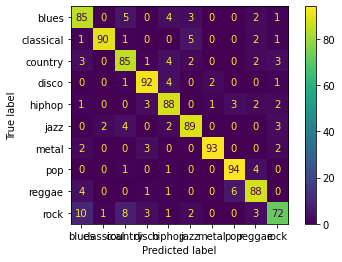

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid.best_estimator_, X, y)
plt.show()

In [57]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=5)

In [ ]:
y_true

In [59]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)

NameError: name 'y_true' is not defined

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_test_pred = model.predict(X_test_vector)

cm = confusion_matrix(
    y_true=y_test_encoded.argmax(axis=1), y_pred=y_test_pred.argmax(axis=1)
)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()

NameError: name 'model' is not defined

In [ ]:
cm = confusion_matrix(np.arange(25), np.arange(25))
cmp = ConfusionMatrixDisplay(cm, display_labels=np.arange(25))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)

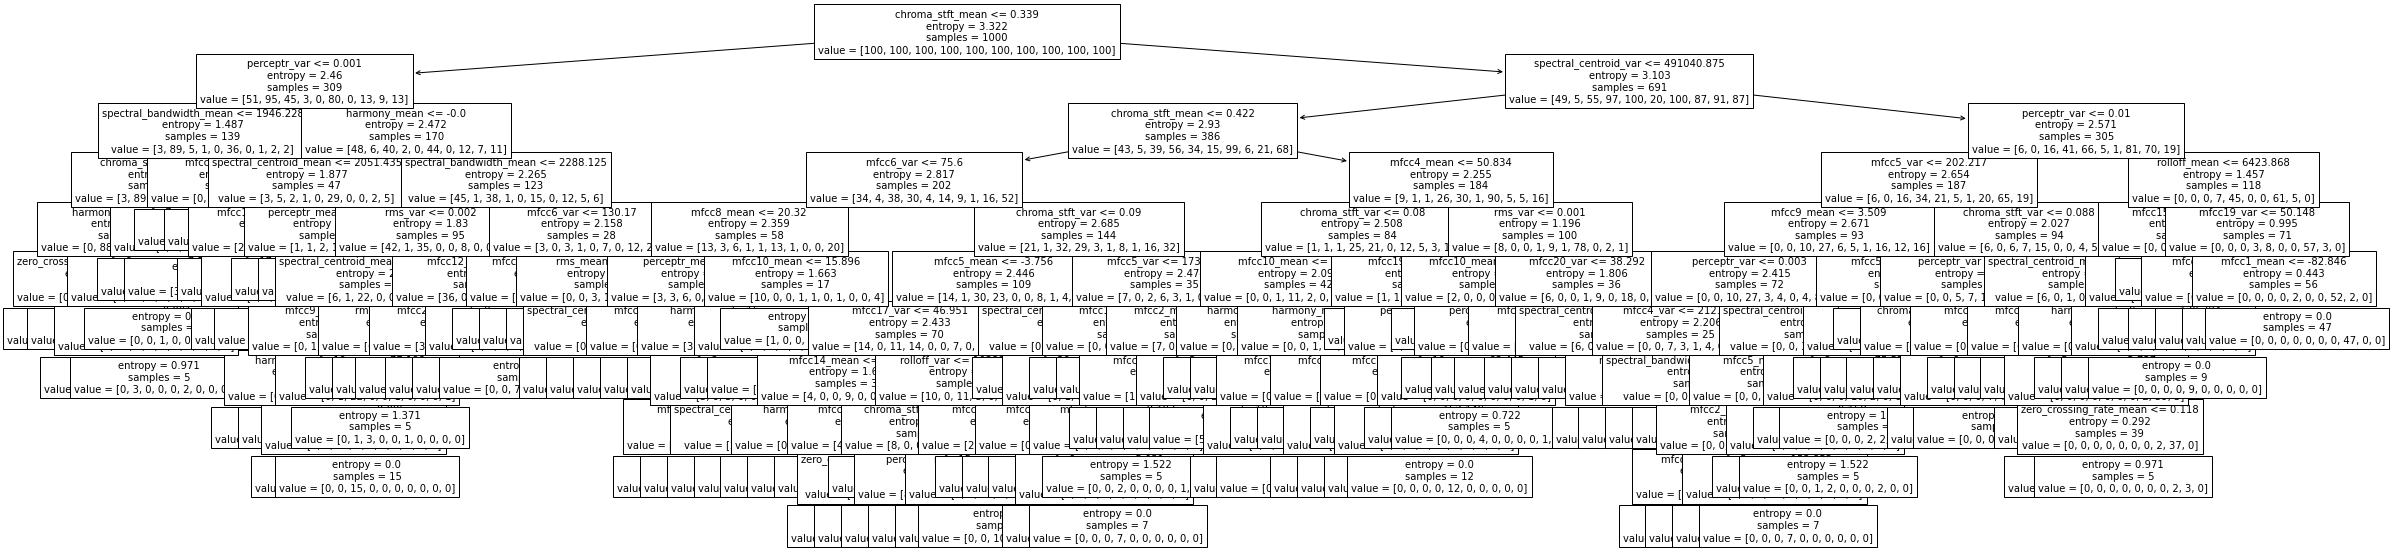

In [67]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(40,10))
tree.plot_tree(grid.best_estimator_, ax=ax, fontsize=10, feature_names=df.columns)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn import svm, datasets
from sklearn.model_selection import RandomizedSearchCV

forest_param = {
    "criterion": ['entropy', 'gini'],
    "max_depth": range(10, 16),
    "min_samples_leaf":range(5, 15),
}

rfc = RandomForestClassifier()

rs = RandomizedSearchCV(rfc, param_distributions=forest_param, cv=5, n_iter=70, random_state=0, n_jobs=-1)
rs.fit(X, y)

print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:", rs.best_score_)

# Final Training selected [arams

In [69]:
final_clf = DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=5)


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [71]:
final_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=5)

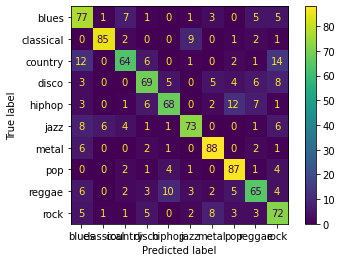

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(final_clf, X, y)
plt.show()

In [74]:
y_pred = final_clf.predict(X_test)

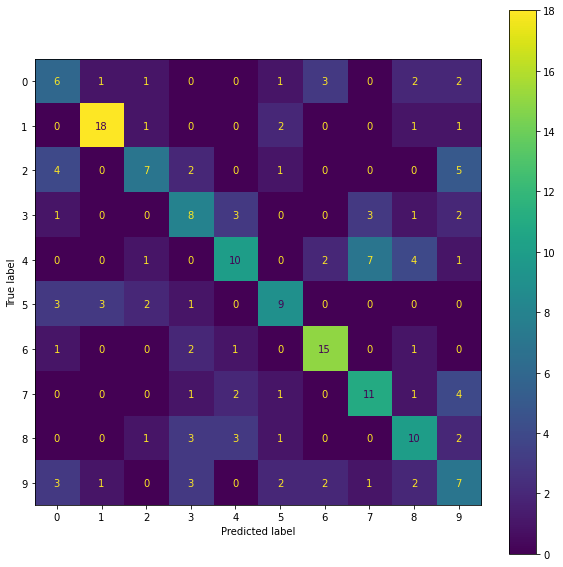

In [75]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)